# Problema:

<img src="image-20240908-162438.png" width="" align="" />

## Integrantes:

<img src="image-20240908-162552.png" width="" align="" />

# 1. Librerías y Carga de datos

## 1.1 Librerías

In [25]:
# Importaciones esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Preprocesamiento y transformación de datos
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

# División de datos
from sklearn.model_selection import train_test_split

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Métricas y evaluación
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Control de advertencias
import warnings
warnings.filterwarnings("ignore")

## 1.2 Carga de datos

In [26]:
df = pd.read_csv('datos_caso_6.csv')

In [27]:
df.head(10)

,loan_status,annual_inc,verification_status,emp_length,home_ownership,int_rate,loan_amnt,purpose,term,grade
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B
5,Fully Paid,36000.0,Source Verified,3 years,RENT,7.90%,5000,wedding,36 months,A
6,Fully Paid,47004.0,Not Verified,8 years,RENT,15.96%,7000,debt_consolidation,60 months,C
7,Fully Paid,48000.0,Source Verified,9 years,RENT,18.64%,3000,car,36 months,E
8,Charged Off,40000.0,Source Verified,4 years,OWN,21.28%,5600,small_business,60 months,F
9,Charged Off,15000.0,Verified,< 1 year,RENT,12.69%,5375,other,60 months,B


In [28]:
# Renaming the columns to Spanish
df.rename(columns={
    'loan_status': 'Estado de la deuda',
    'annual_inc': 'Ingresos anuales',
    'verification_status': 'Validación de historial crediticio',
    'emp_length': 'Tiempo laborado',
    'home_ownership': 'Tipo de vivienda',
    'int_rate': 'Tasa de interés',
    'loan_amnt': 'Monto del crédito',
    'purpose': 'Propósito del crédito',
    'term': 'Duración del crédito',
    'grade': 'Calificación de riesgo'
}, inplace=True)

In [29]:
df.head(10)

,Estado de la deuda,Ingresos anuales,Validación de historial crediticio,Tiempo laborado,Tipo de vivienda,Tasa de interés,Monto del crédito,Propósito del crédito,Duración del crédito,Calificación de riesgo
0,Fully Paid,24000.0,Verified,10+ years,RENT,10.65%,5000,credit_card,36 months,B
1,Charged Off,30000.0,Source Verified,< 1 year,RENT,15.27%,2500,car,60 months,C
2,Fully Paid,12252.0,Not Verified,10+ years,RENT,15.96%,2400,small_business,36 months,C
3,Fully Paid,49200.0,Source Verified,10+ years,RENT,13.49%,10000,other,36 months,C
4,Fully Paid,80000.0,Source Verified,1 year,RENT,12.69%,3000,other,60 months,B
5,Fully Paid,36000.0,Source Verified,3 years,RENT,7.90%,5000,wedding,36 months,A
6,Fully Paid,47004.0,Not Verified,8 years,RENT,15.96%,7000,debt_consolidation,60 months,C
7,Fully Paid,48000.0,Source Verified,9 years,RENT,18.64%,3000,car,36 months,E
8,Charged Off,40000.0,Source Verified,4 years,OWN,21.28%,5600,small_business,60 months,F
9,Charged Off,15000.0,Verified,< 1 year,RENT,12.69%,5375,other,60 months,B


## 1.3 Preparación de los datos

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38705 entries, 0 to 38704
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Estado de la deuda                  38705 non-null  object 
 1   Ingresos anuales                    38705 non-null  float64
 2   Validación de historial crediticio  38705 non-null  object 
 3   Tiempo laborado                     38705 non-null  object 
 4   Tipo de vivienda                    38705 non-null  object 
 5   Tasa de interés                     38705 non-null  object 
 6   Monto del crédito                   38705 non-null  int64  
 7   Propósito del crédito               38705 non-null  object 
 8   Duración del crédito                38705 non-null  object 
 9   Calificación de riesgo              38705 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.0+ MB


In [33]:
df = df.sample(frac=0.2, random_state=42)

In [34]:
# Asegurarnos de que todos los valores en 'Tasa de interés' sean cadenas antes de quitar el símbolo de porcentaje
df['Tasa de interés'] = df['Tasa de interés'].astype(str).str.rstrip('%').astype(float)

# Verificar si la columna se ha convertido correctamente
df['Tasa de interés'].dtypes, df['Tasa de interés'].head()

(dtype('float64'),
 32122     7.05
 1072     17.27
 6757     10.65
 32091    11.48
 18701     7.66
 Name: Tasa de interés, dtype: float64)

In [35]:
df['Duración del crédito'] = df['Duración del crédito'].str.replace('months', '').astype(int)
print(df['Duración del crédito'].dtypes, df['Duración del crédito'].head())

int32 32122    36
1072     60
6757     60
32091    36
18701    36
Name: Duración del crédito, dtype: int32


In [36]:
df['Validación de historial crediticio'] = df['Validación de historial crediticio'].replace({
    'Source': 1, 'Source Verified': 1, 'Verified': 1, 'Not Verified': 0
}).astype(int)
print(df['Validación de historial crediticio'].dtypes, df['Validación de historial crediticio'].head())

int32 32122    0
1072     1
6757     1
32091    0
18701    0
Name: Validación de historial crediticio, dtype: int32


In [37]:
df = df[df['Tipo de vivienda'] != 'OTHER']
df['Tipo de vivienda'] = df['Tipo de vivienda'].replace({
    'RENT': 1,
    'MORTGAGE': 2,
    'OWN': 0
}).astype(int)
print(df['Tipo de vivienda'].value_counts())


Tipo de vivienda
1    3688
2    3462
0     571
Name: count, dtype: int64


In [38]:
df['Estado de la deuda'] = df['Estado de la deuda'].replace({
    'Charged Off': 0, 'Fully Paid': 1
}).astype(int)
print(df['Estado de la deuda'].dtypes, df['Estado de la deuda'].head())

int32 32122    1
1072     0
6757     1
32091    1
18701    1
Name: Estado de la deuda, dtype: int32


In [39]:
df['Tiempo laborado'] = df['Tiempo laborado'].replace({
    '10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7, '6 years': 6, '5 years': 5, '4 years': 4, '3 years': 3, '2 years': 2, '1 year': 1, '< 1 year': 0
}).astype(int)
print(df['Tiempo laborado'].dtypes, df['Tiempo laborado'].head())

int32 32122    10
1072     10
6757     10
32091     0
18701     1
Name: Tiempo laborado, dtype: int32


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7721 entries, 32122 to 38525
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Estado de la deuda                  7721 non-null   int32  
 1   Ingresos anuales                    7721 non-null   float64
 2   Validación de historial crediticio  7721 non-null   int32  
 3   Tiempo laborado                     7721 non-null   int32  
 4   Tipo de vivienda                    7721 non-null   int32  
 5   Tasa de interés                     7721 non-null   float64
 6   Monto del crédito                   7721 non-null   int64  
 7   Propósito del crédito               7721 non-null   object 
 8   Duración del crédito                7721 non-null   int32  
 9   Calificación de riesgo              7721 non-null   object 
dtypes: float64(2), int32(5), int64(1), object(2)
memory usage: 512.7+ KB


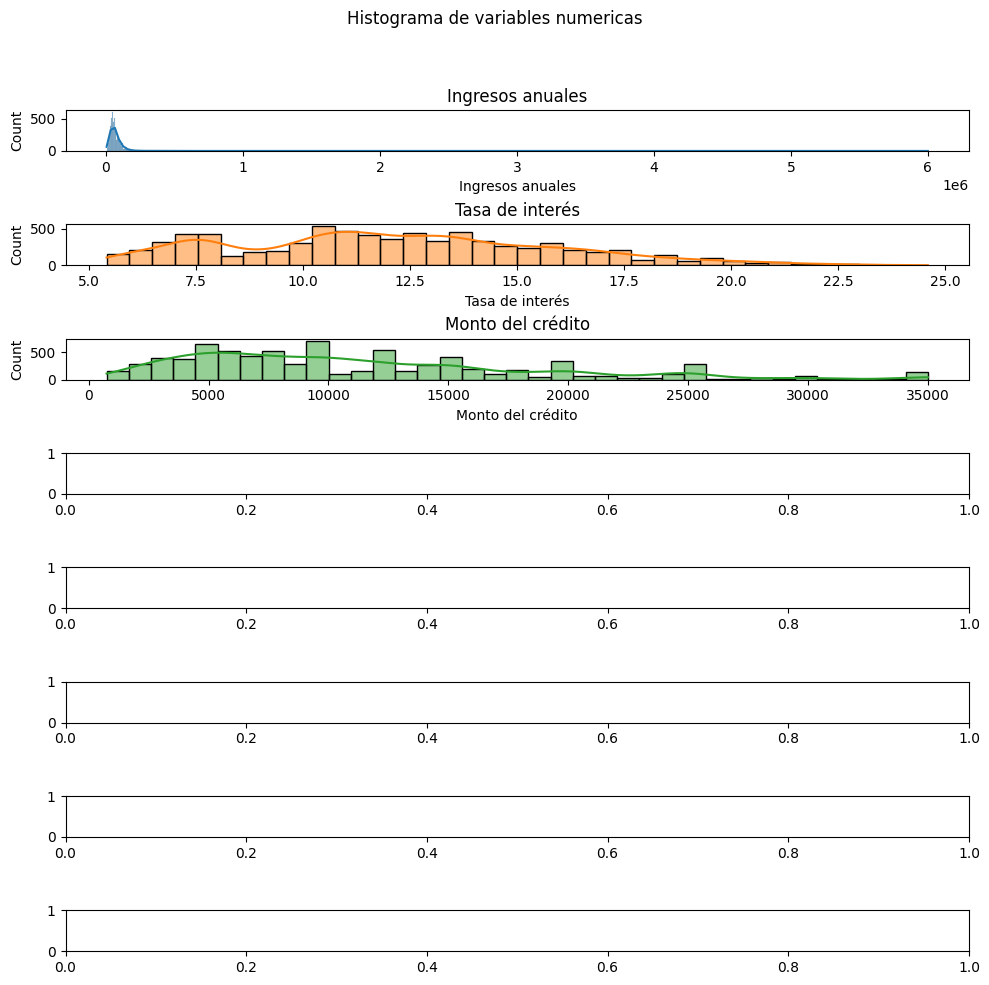

In [41]:
## Estadistica univariada
## Histograma de frecuenteia de varibales numericas
fig, ax = plt.subplots(8, 1, figsize=(10,10))
ax = ax.flat
num_col= df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data=df, kde=True,x=col,color=(list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'], ax=ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('Histograma de variables numericas')
plt.show()

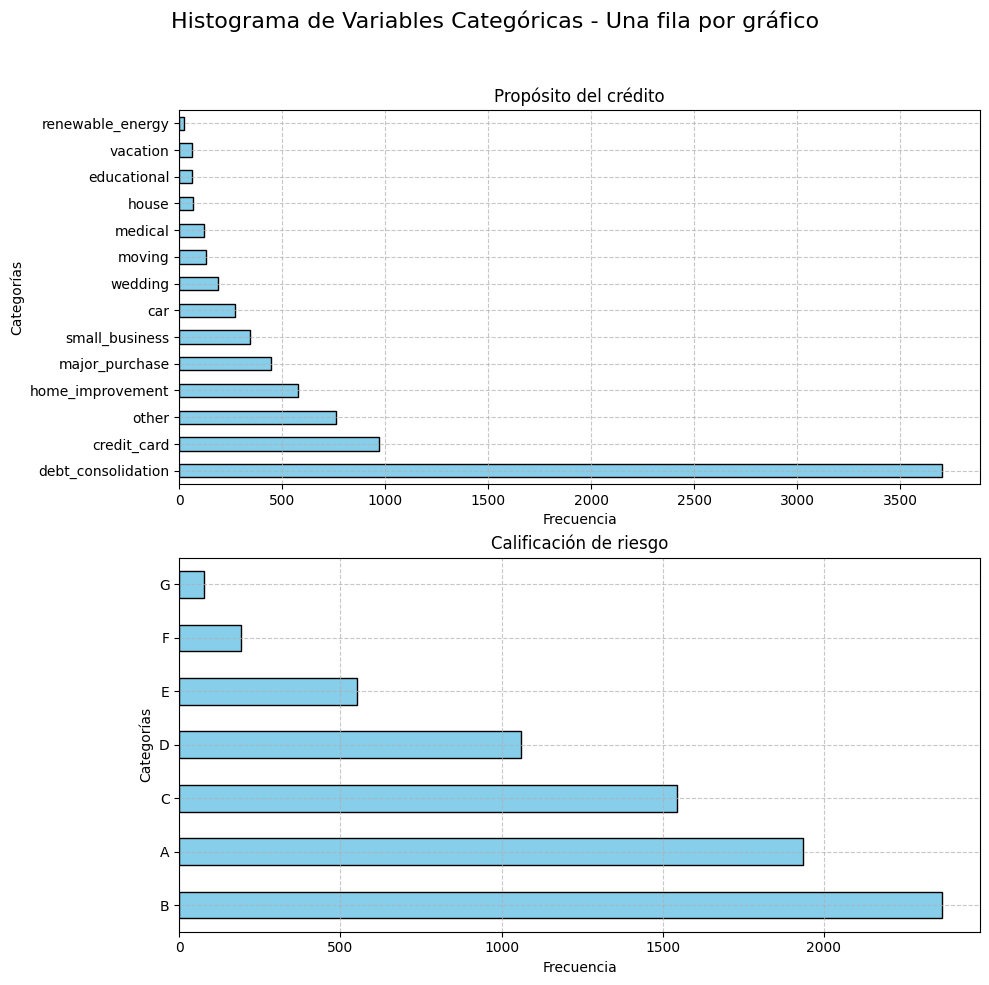

In [42]:
# Ajuste del gráfico para mostrar una fila por gráfico

# Obtención de las columnas categóricas
cat_data = df.select_dtypes(include=['object']).columns

# Ajustar el número de subgráficos a una fila por variable categórica
fig, ax = plt.subplots(len(cat_data), 1, figsize=(10, 5 * len(cat_data)))  # 1 columna, tantas filas como variables categóricas
ax = ax.flat

# Generar un histograma para cada variable categórica
for i, col in enumerate(cat_data):
    df[col].value_counts().plot.barh(ax=ax[i], color='skyblue', edgecolor='black')
    ax[i].set_title(col, fontsize=12)
    ax[i].set_xlabel('Frecuencia')
    ax[i].set_ylabel('Categorías')
    ax[i].grid(True, linestyle='--', alpha=0.7)

# Ajustar el layout para que no se sobrepongan los gráficos
fig.tight_layout()
fig.subplots_adjust(top=0.88)
fig.suptitle('Histograma de Variables Categóricas - Una fila por gráfico', fontsize=16)

plt.show()


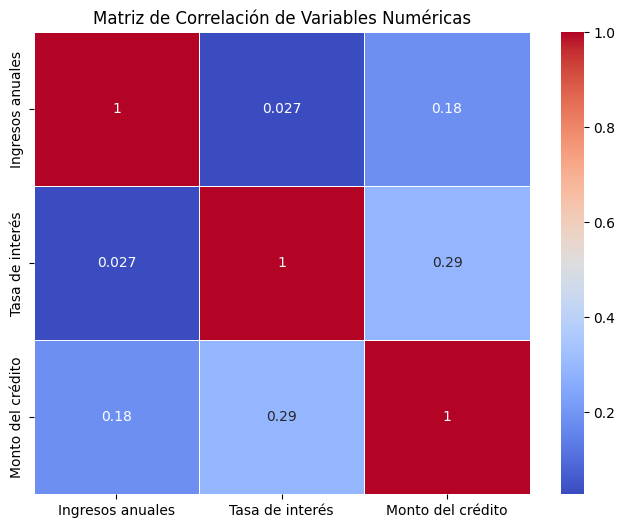

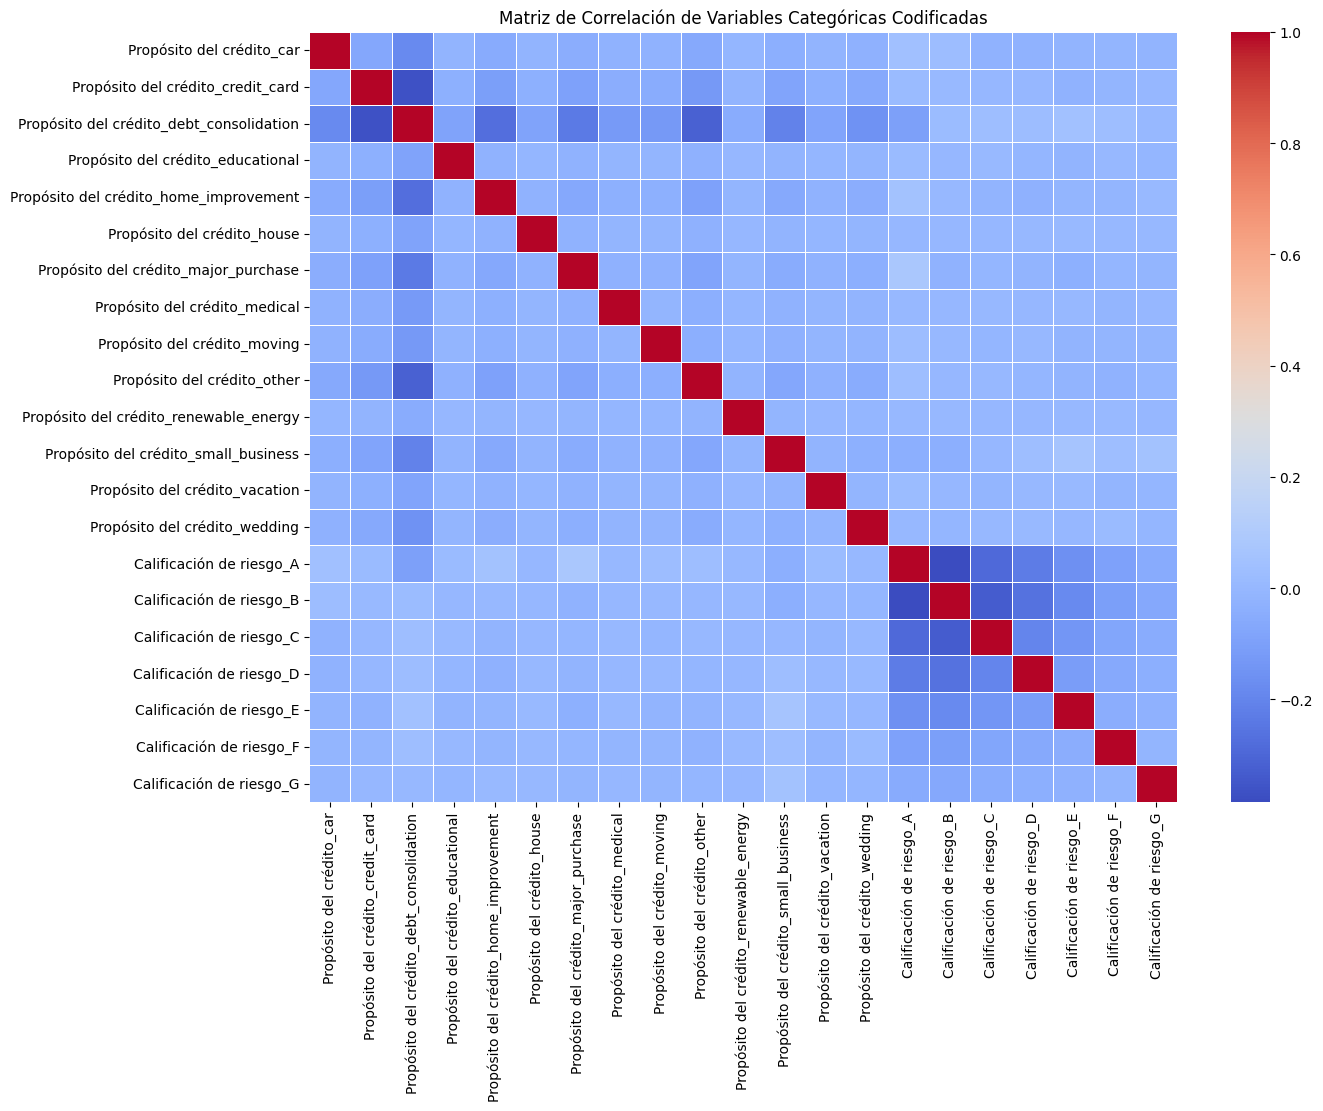

In [44]:
# Para la correlación de las variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Filtramos las variables numéricas
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación para variables numéricas
corr_matrix_numeric = numeric_data.corr()

# Gráfico de correlación para variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_numeric, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Para la correlación de las variables categóricas usando OneHotEncoding
cat_data = df.select_dtypes(include=['object'])

# Aplicar OneHotEncoding a las variables categóricas
encoder = OneHotEncoder(sparse_output=False)
cat_encoded = encoder.fit_transform(cat_data)

# Convertimos el resultado en un DataFrame
cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(cat_data.columns))

# Calculamos la matriz de correlación para las variables categóricas codificadas
corr_matrix_cat = cat_encoded_df.corr()

# Gráfico de correlación para variables categóricas codificadas
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_cat, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Categóricas Codificadas')
plt.show()

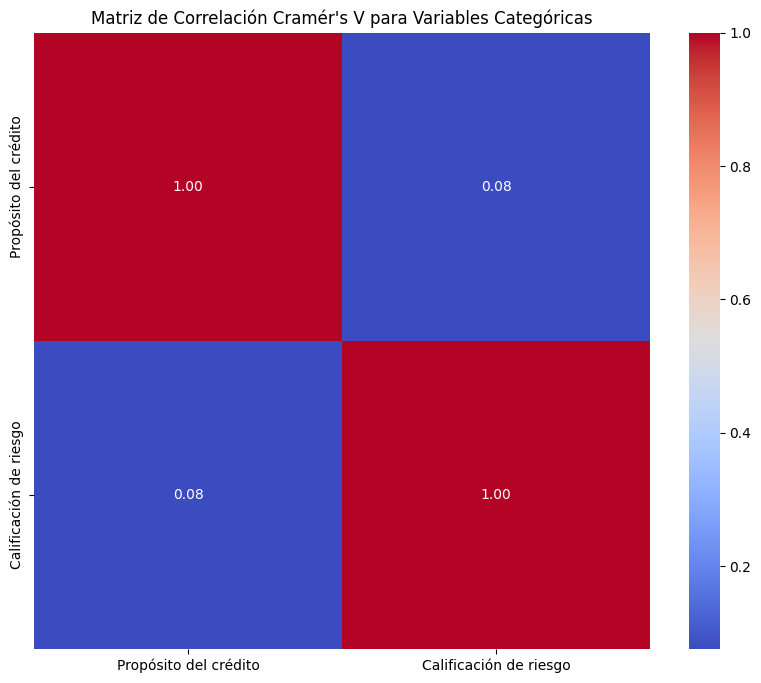

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_stat = chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

corr_matrix = corr_matrix.astype(float)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación Cramér\'s V para Variables Categóricas')
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7721 entries, 32122 to 38525
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Estado de la deuda                  7721 non-null   int32  
 1   Ingresos anuales                    7721 non-null   float64
 2   Validación de historial crediticio  7721 non-null   int32  
 3   Tiempo laborado                     7721 non-null   int32  
 4   Tipo de vivienda                    7721 non-null   int32  
 5   Tasa de interés                     7721 non-null   float64
 6   Monto del crédito                   7721 non-null   int64  
 7   Propósito del crédito               7721 non-null   object 
 8   Duración del crédito                7721 non-null   int32  
 9   Calificación de riesgo              7721 non-null   object 
dtypes: float64(2), int32(5), int64(1), object(2)
memory usage: 512.7+ KB


# Transformación de variables categóricas

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Separar características y variable objetivo
X = df.drop('Calificación de riesgo', axis=1)
y = df['Calificación de riesgo']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Seleccionar columnas numéricas y categóricas
num_col = X.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_col = X.select_dtypes(include=['object']).columns.to_list()

# Crear pipelines para la transformación de variables numéricas y categóricas
num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
cat_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

# Aplicar ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_col),
    ('cat', cat_transformer, cat_col)
])

# Transformar los datos
X_pre = preprocessor.fit_transform(X_train)

# Comprobar el número de columnas generadas
print(f"Shape de X_pre: {X_pre.shape}")

# Obtener nombres de las características después del OneHotEncoding
cat_encoded_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)

# Concatenar las etiquetas numéricas y categóricas
labels = np.concatenate([num_col, cat_encoded_names])

# Comprobar el número de columnas esperadas
print(f"Número de etiquetas: {len(labels)}")

# Crear el DataFrame con las columnas correctas
X_pro = pd.DataFrame(X_pre, columns=labels)

# Mostrar las primeras filas del DataFrame transformado
X_pro.head()


Shape de X_pre: (5404, 17)
Número de etiquetas: 17


,Ingresos anuales,Tasa de interés,Monto del crédito,Propósito del crédito_car,Propósito del crédito_credit_card,Propósito del crédito_debt_consolidation,Propósito del crédito_educational,Propósito del crédito_home_improvement,Propósito del crédito_house,Propósito del crédito_major_purchase,Propósito del crédito_medical,Propósito del crédito_moving,Propósito del crédito_other,Propósito del crédito_renewable_energy,Propósito del crédito_small_business,Propósito del crédito_vacation,Propósito del crédito_wedding
0,0.006705,0.258738,0.235036,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.007539,0.459051,0.153285,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.004537,0.029734,0.036496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006371,0.296818,0.211679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004203,0.335942,0.197080,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelado supervisado: selección de variable categórica [Clasificación de modelos]

In [71]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


In [77]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

def mineria_Modelos_Supervisados():
    pipelines = {
        'Regresión Logística': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())]),
        'SVM': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(probability=True))]),
        'K-Nearest Neighbors': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())]),
        'Árbol de Decisión': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())]),
        'Random Forest': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())]),
        'AdaBoost': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', AdaBoostClassifier())]),
        'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier())])
    }

    param_grids = {
        'Regresión Logística': {
            'classifier__penalty': ['l1', 'l2', 'elasticnet', None],
            'classifier__C': [0.00001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000]
        },
        'SVM': {
            'classifier__C': [0.00001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000],
            'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'classifier__gamma': ['scale', 'auto'],
            'classifier__degree': [2, 3, 4, 5]  # Aplica solo a kernel 'poly'
        },
        'K-Nearest Neighbors': {
            'classifier__n_neighbors': [3, 5, 7, 9, 11],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2]
        },
        'Árbol de Decisión': {
            'classifier__criterion': ['log_loss', 'gini', 'entropy'],
            'classifier__max_depth': [5, 10, 15, 20],
            'classifier__max_leaf_nodes': [None, 10, 12, 15],
            'classifier__min_samples_split': [2, 3, 4, 5]
        },
        'Random Forest': {
            'classifier__n_estimators': [100, 150, 200],
            'classifier__max_depth': [2, 3, 5, 7],
            'classifier__criterion': ['log_loss', 'gini', 'entropy']
        },
        'AdaBoost': {
            'classifier__n_estimators': [50, 100, 150, 200, 250],
            'classifier__learning_rate': [0.01, 0.1, 1]
        },
        'Gradient Boosting': {
            'classifier__n_estimators': [50, 100],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__criterion': ['friedman_mse', 'squared_error'],
            'classifier__max_depth': [3, 5, 7]
        }
    }

    plt.figure(figsize=(15, 10))

    for name, pipeline in pipelines.items():
        print(f"\n{name}")

        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        best_pipeline = grid_search.best_estimator_

        y_pred = best_pipeline.predict(X_test)
        y_prob = best_pipeline.predict_proba(X_test)[:, 1]

        print("Best Parameters:")
        print(grid_search.best_params_)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        print("\nConfusion Matrix:")
        print(cm)

        plot_confusion_matrix(cm, classes=y.unique(), title=f'{name} - Confusion Matrix')

        # Generar la curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=y.unique()[1])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curvas ROC de los Modelos')
    plt.legend(loc='lower right')
    plt.show()


Regresión Logística
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:
{'classifier__C': 1e-05, 'classifier__penalty': None}

Classification Report:
              precision    recall  f1-score   support

           A       0.97      0.97      0.97       579
           B       0.93      0.91      0.92       716
           C       0.77      0.86      0.81       452
           D       0.66      0.67      0.67       312
           E       0.60      0.49      0.54       181
           F       0.51      0.54      0.52        56
           G       0.62      0.38      0.47        21

    accuracy                           0.84      2317
   macro avg       0.72      0.69      0.70      2317
weighted avg       0.83      0.84      0.83      2317


Confusion Matrix:
[[559  20   0   0   0   0   0]
 [ 17 651  48   0   0   0   0]
 [  0  30 388  34   0   0   0]
 [  0   0  66 210  36   0   0]
 [  0   0   2  72  89  18   0]
 [  0   0   0   0  21  30   5]
 [  0   0   0   0   

<Figure size 1500x1000 with 0 Axes>

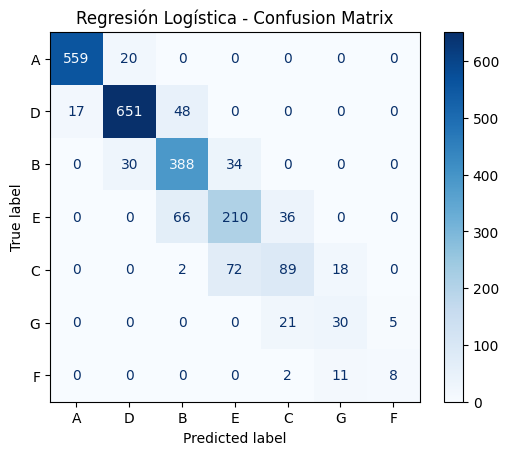


SVM
Fitting 5 folds for each of 256 candidates, totalling 1280 fits


KeyboardInterrupt: 

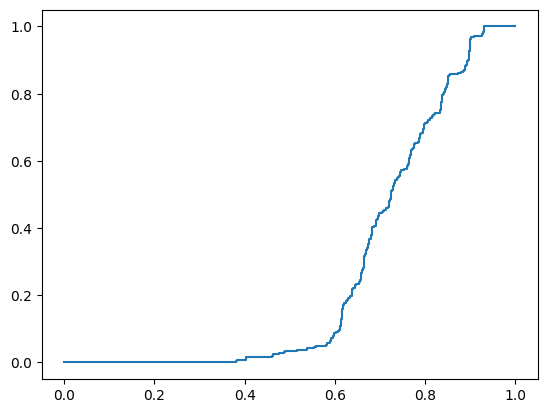

In [78]:
mineria_Modelos_Supervisados()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=131b97d2-868d-4837-a30e-a6d9f74a3f58' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>